## Import all required libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

## Load CIFAR10 Data

Load training and test samples from cifar10 dataset. Then normalize pixel values to be between 0 and 1 by dividing 255.0.

In [2]:
# Load the CIFAR-10 
(train_images, y_train), (test_images, y_test) = cifar10.load_data()

# Normalize image values
train_images = train_images / 255.0
test_images = test_images / 255.0

#Output shape for visualization
print('Training images shape:', train_images.shape)
print('Training labels shape:', y_train.shape)
print('Test images shape:', test_images.shape)
print('Test labels shape:', y_test.shape)

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


## Data preparation for fully connected neural networks

Before we use convolutional neural network for image classification task, people used fully connected neural networks. In this section, we will prepare the data for FNN.

To implement FNN, we require a dataset which is a 2D numpy array where each row represents each sample and each column is a features. For image dataset, we will have 3D numpy array (grey images) or 4D numpy array (color images). Our goal is to reshaping 3D/4D numpy array to 2D numpy array such that each row is one image and columns are pixel values.

Simplification: For grey images, you can assume the shape is (m,d1,d2) where m is the number of images, d1 and d2 are the numbers of pixels on each side. For color images, you can assume the shape is (m,d1,d2,r) where m, d1, d2 have the same meaning as before and r is the number of color channels (usually r=3 or 4).

Please write a function to do this step. Your function should work for all image datasets (both grey and color images). Detailed docstring is required to explain your function. You must include the shape of your inputs and outputs when you write the docstring.

Some test codes are given to verify your codes.

**Later, you will use the function you write to generate inputs that is used to train your FNN models.**

In [3]:
def image_reshape(images):
    """
    Flattens 3D or 4D np array of images into a 2D np array

    Args:
    - images (np array): A np array of the image

    Returns:
    - np array: 2D numpy array; each row corresponds to the image
      flattened to one vector
    """

    #Ensure the dimension is correct; otherwise raise ValueError
    if images.ndim == 3 or images.ndim == 4:  
        return images.reshape(images.shape[0], -1)
    else:
        raise ValueError("Input error")


In [4]:
# test example 1:
X1 = np.arange(24).reshape(3,2,4)

#testing the function
image_reshape(X1)

# Passing X1 to your function will return 
# array([[ 0,  1,  2,  3,  4,  5,  6,  7],
#        [ 8,  9, 10, 11, 12, 13, 14, 15],
#        [16, 17, 18, 19, 20, 21, 22, 23]])

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [5]:
# test example 2:
X2 = np.arange(48).reshape(3,2,4,2)

#testing the function
image_reshape(X2)

# Passing X2 to your function will return 
# array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
#        [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
#        [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [6]:
# test example 3:
X_train = image_reshape(train_images)
idx = 1
np.allclose(X_train[1], train_images[1].flatten())

# let me explain this example further,
# train_images is the training images obtained from loading CIFAR10 data
# passing train_images to the function gives X_train.
#
#
# Notice that X_train and train_images are variables I defined, you may have different names.
# image_reshape is my function, you may also have different function name
# 
# Once you adjust variable names and function names, there is no error raised
# the output of this test example is True

True

## Construct your FNN model

In this section, you will construct a fully connected neural network. You only need to create the model by calling `tensorflow.models.Sequential` (other methods are also acceptable), and you do not need to train the model.

**Model:** This Neural network contains three hidden layers with number of neurons 50, 50, 50, respectively. The activation function is ReLU and you should use "he_normal" initialization for all hidden layers. 

You should determine the number of neurons in the input layer and output layer and report the total number of parameters.

In [7]:
#Create FNN model
fnn = tf.keras.models.Sequential([
    #Input layer and first hidden layer
    tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(3072,)),
    #Hidden layers
    tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal'),
    #Output layer
    tf.keras.layers.Dense(10,activation='softmax')
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Construct your CNN models

In this section, you will construct two convolutional neural networks. You do not need to train the models. Just define them using `tensorflow.models.Sequential`.

I do not have any instructions on the cnstruction of your models. You should define two models and your models should be different. Feel free to change the neural network structure, kernel size, number of neurons, and etc. Please do not use very complicated model, you will reach computation limitation. Your model should be different from the model in my lecture notes.

**Suggestion**: It is better to think about a question first, and then determine model structure. For example, suppose you want to understand how the number of convolution layers affects the test accuracy, then you can define two models which contain different numbers of convolution layers. To make the comparison fair, you should make other factors the same. Try to think about the question you are interested in and design the models.


In [8]:
#Create CNN model with lesser number of convolutions
low_conv_cnn = tf.keras.models.Sequential([
    # Convolutional Layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Pooling Layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Flatten the output of pooling
    tf.keras.layers.Flatten(),
    # Dense Layer
    tf.keras.layers.Dense(64, activation='relu'),
    # Output Layer
    tf.keras.layers.Dense(10, activation='softmax')
])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#Create CNN model with higher number of convolutions
high_conv_cnn = tf.keras.models.Sequential([
    # Convolutional Layer 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Convolutional Layer 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Pooling Layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Convolutional Layer 3
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    # Flatten the output of pooling
    tf.keras.layers.Flatten(),
    # Hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    # Output Layer
    tf.keras.layers.Dense(10, activation='softmax')
])

## Train your model

In this part, you should write a function to train your models. Your function should take the model, training samples, test samples, and batch_size as inputs and returns test accuracy after each epoch. Detailed function docstring is required. Your function should not include any global variables.

Comments:
1. Since this is a classification problem, you can use the same loss function and metric for all different models. You should determine the loss function and metric.

2. Please use epochs=5, otherwise it takes long to train your models.


In [10]:
#prepare the data for FNN model by reshaping the data
X_train = image_reshape(train_images)
X_test = image_reshape(test_images)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#check the shapes
X_train.shape, y_train.shape

((50000, 3072), (50000, 10))

In [11]:
def train_model(model, X_train, y_train, X_test, y_test, batch_size, optimizer, epochs=5):
    """
    Train neural network model and evaluate accuracy
    
    Args:
    - model (tf Model): neural network model to train
    - X_train (np array): Training data
    - y_train (np array): Training labels; one-hot encoded to 10
    - X_test (np array): Test data
    - y_test (np array): Test labels; one-hot encoded to 10
    - batch_size (int): number of samples per batch
    - optimizer (tf Optimizer): The optimizer for training
    - epochs (int): The number of epochs to train; 5 as default
    
    Returns:
    - list: test accuracy of each epoch
    """
    # Compile model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # List for storing accuracy
    accuracies = []

    # Train model using for loop for each epoch
    for epoch in range(epochs):
        model.fit(X_train, y_train, batch_size=batch_size, epochs=1, verbose=1)

        test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
        accuracies.append(test_accuracy)

        #print result
        print(f'Test accuracy of epoch {epoch+1}: {test_accuracy}')
    
    return accuracies

## Numeircal experiments:

Now we can do our numerical experiments. Remember that we have three models (1 FNN, 2 CNNs), You should try different batch sizes and optimizers for each model, see below:

- Batch_size = 16 or 64.

Now, we have 6 different combinations. Please visualize all test accuracies in 1 plot. See my sample plot below. 


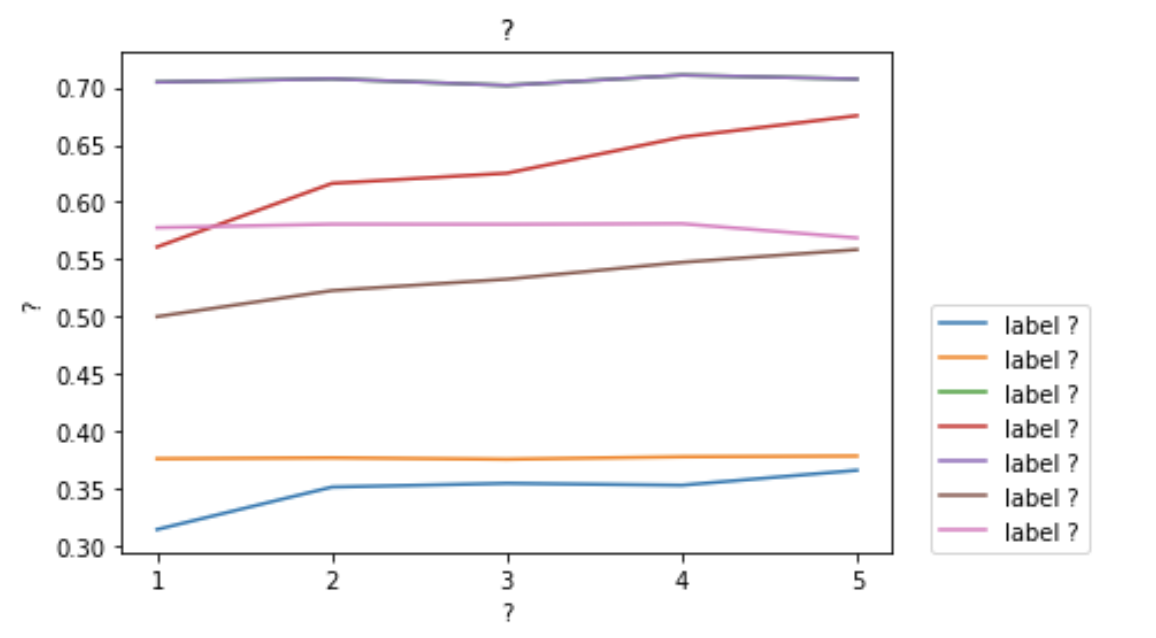

I do not have any legends, labels, title, and etc in my plot, you should include informative legends, labels, title, and etc. You can also add other features (e.g. markers) to create nice plot. You are welcome to use either matplotlib or seaborn to draw your plot.


**Important remark: It takes me 14 minutes to train 6 models. If your training time is longer than you expect, please try to use simple CNN models.** 



In [12]:
# Apply model to 6 different combinations with Adam optimizer
results = {}

# FNN of batch size 16
fnn_16_adam = tf.keras.models.clone_model(fnn)
fnn_16_adam.set_weights(fnn.get_weights())
results['FNN_16_Adam'] = train_model(fnn_16_adam, X_train, y_train, X_test, y_test, 16, tf.keras.optimizers.Adam())

# FNN of batch size 64
fnn_64_adam = tf.keras.models.clone_model(fnn)
fnn_64_adam.set_weights(fnn.get_weights())
results['FNN_64_Adam'] = train_model(fnn_64_adam, X_train, y_train, X_test, y_test, 64, tf.keras.optimizers.Adam())

# LowConvCNN of batch size 16
low_conv_cnn_16_adam = tf.keras.models.clone_model(low_conv_cnn)
low_conv_cnn_16_adam.set_weights(low_conv_cnn.get_weights())
results['LowConvCNN_16_Adam'] = train_model(low_conv_cnn_16_adam, train_images, y_train, test_images, y_test, 16, tf.keras.optimizers.Adam())

# LowConvCNN of batch size 64
low_conv_cnn_64_adam = tf.keras.models.clone_model(low_conv_cnn)
low_conv_cnn_64_adam.set_weights(low_conv_cnn.get_weights())
results['LowConvCNN_64_Adam'] = train_model(low_conv_cnn_64_adam, train_images, y_train, test_images, y_test, 64, tf.keras.optimizers.Adam())

# HighConvCNN of batch size 16
high_conv_cnn_16_adam = tf.keras.models.clone_model(high_conv_cnn)
high_conv_cnn_16_adam.set_weights(high_conv_cnn.get_weights())
results['HighConvCNN_16_Adam'] = train_model(high_conv_cnn_16_adam, train_images, y_train, test_images, y_test, 16, tf.keras.optimizers.Adam())

# HighConvCNN of batch size 64
high_conv_cnn_64_adam = tf.keras.models.clone_model(high_conv_cnn)
high_conv_cnn_64_adam.set_weights(high_conv_cnn.get_weights())
results['HighConvCNN_64_Adam'] = train_model(high_conv_cnn_64_adam, train_images, y_train, test_images, y_test, 64, tf.keras.optimizers.Adam())

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 697us/step - accuracy: 0.2367 - loss: 2.0389
Test accuracy of epoch 1: 0.3133000135421753
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 773us/step - accuracy: 0.3189 - loss: 1.8595
Test accuracy of epoch 2: 0.3174999952316284
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 892us/step - accuracy: 0.3291 - loss: 1.8289
Test accuracy of epoch 3: 0.3407999873161316
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 821us/step - accuracy: 0.3356 - loss: 1.8125
Test accuracy of epoch 4: 0.34630000591278076
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 810us/step - accuracy: 0.3453 - loss: 1.7960
Test accuracy of epoch 5: 0.3319000005722046
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2464 - loss: 2.0559
Test accuracy of epoch 1: 0.32089999318122864
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3604 - loss: 1.7863
Test accuracy of epoch 2: 0.3619999885559082
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3909 - loss: 1.7079
Test accuracy of epoch 3: 0.38429999351501465
782/782 ━━━━━━━━━

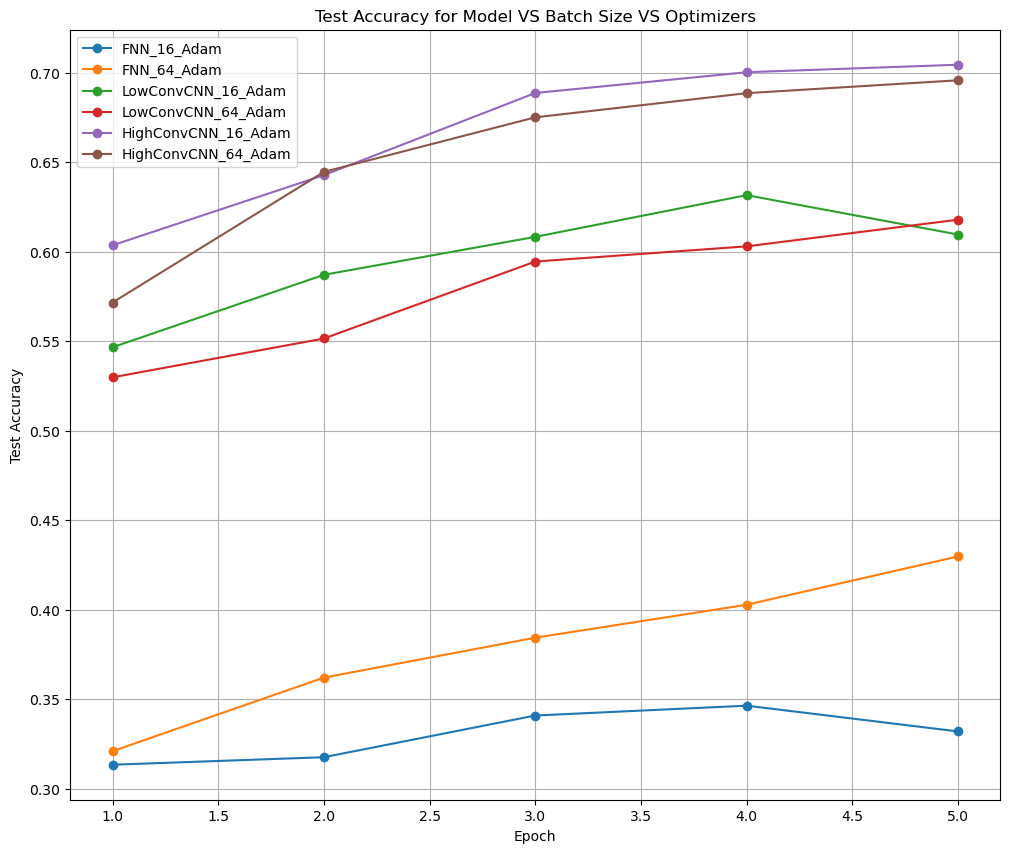

In [13]:
# Plot the results
plt.figure(figsize=(12, 10))
for key, accuracies in results.items():
    plt.plot(range(1, 6), accuracies, label=key, marker='o')

plt.title('Test Accuracy for Model VS Batch Size VS Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Repeate your experiments:

Since there is randomness in your experiment such as the random initialization of your parameters (`he_normal`) and random shuffle of your dataset (`model.fit`), we usually repeat previous experiments many times and compute the mean to alleviate the randomness. We can also compute the standard deviation to measure the variation. We expect small standard deviation and it means that randomness in your experiment does not change your test accuracy too much.

You may notice that training CNN is time consuming. To save your time, we will do this part only for FNN. 

Please repeat your previous experiments 5 times for your FNN model. Specifically, you should repeat the following process 5 times: create your FNN model, select batch_size = 16/64, train your model and record test accuracy. 

Then, compute average test accuracy (1 decimal place) and standard deviation (1 decimal places) after each epoch and fill in the following table. 

In ths following table, 67.1% is the average test accuracy, 5.1% is the standard deviation. You should replace them using the data you compute. I only use those numbers to generate this template, and they do not have any real meaning.

|                      |   Epoch 1    |   Epoch 2    |   Epoch 3    |   Epoch 4    |   Epoch 5    |
|:--------------------:|:------------:|:------------:|:------------:|:------------:|:------------:|
|    batch_size = 16   |67.1%$\pm$5.1%|67.1%$\pm$5.1%|67.1%$\pm$5.1%|67.1%$\pm$5.1%|67.1%$\pm$5.1%|
|    batch_size = 64   |67.1%$\pm$5.1%|67.1%$\pm$5.1%|67.1%$\pm$5.1%|67.1%$\pm$5.1%|67.1%$\pm$5.1%|


In [14]:
# store results
results = {16: [], 64: []}
batch_sizes = [16, 64]

# iterate through different batch sizes and epoches, add to dictionary
for size in batch_sizes:
    for i in range(5):
        accuracies = train_model(fnn, X_train, y_train, X_test, y_test, size, tf.keras.optimizers.Adam())
        results[size].append(accuracies)

mean_accuracies = {size: np.mean(results[size], axis=0) for size in batch_sizes}
std_accuracies = {size: np.std(results[size], axis=0) for size in batch_sizes}

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 751us/step - accuracy: 0.2563 - loss: 2.0198
Test accuracy of epoch 1: 0.3418000042438507
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 749us/step - accuracy: 0.3567 - loss: 1.7834
Test accuracy of epoch 2: 0.37450000643730164
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 829us/step - accuracy: 0.3764 - loss: 1.7255
Test accuracy of epoch 3: 0.37220001220703125
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 782us/step - accuracy: 0.3956 - loss: 1.6850
Test accuracy of epoch 4: 0.4083000123500824
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 804us/step - accuracy: 0.4086 - loss: 1.6526
Test accuracy of epoch 5: 0.4113999903202057
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 766us/step - accuracy: 0.4132 - loss: 1.6333
Test accuracy of epoch 1: 0.41940000653266907
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 809us/step - accuracy: 0.4206 - loss: 1.6183
Test accuracy of epoch 2: 0.4221000075340271
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 768us/step - accuracy: 0.4233 - loss: 1.6078
Test accuracy of epoch 3: 0.427700012922287
3125/3

In [15]:
#print results for batch size 16
print("Batch size = 16 (mean ± std):")
for epoch in range(5):
    print(f"Epoch {epoch+1}: {mean_accuracies[16][epoch]*100:.1f}% ± {std_accuracies[16][epoch]*100:.1f}%")
#print results for batch size 64
print("\nBatch size = 64 (mean ± std):")
for epoch in range(5):
    print(f"Epoch {epoch+1}: {mean_accuracies[64][epoch]*100:.1f}% ± {std_accuracies[64][epoch]*100:.1f}%")

# Prepare the data for table
mean_accuracies_16_str = [f"{mean:.1f}±{std:.1f}" for mean, std in zip(mean_accuracies[16]*100, std_accuracies[16]*100)]
mean_accuracies_64_str = [f"{mean:.1f}±{std:.1f}" for mean, std in zip(mean_accuracies[64]*100, std_accuracies[64]*100)]

# Print the table
print("\n|                      | Epoch 1| Epoch 2| Epoch 3| Epoch 4| Epoch 5|")
print("|----------------------|--------|--------|--------|--------|--------|")
print(f"|    batch_size = 16   |{'|'.join(mean_accuracies_16_str)}|")
print(f"|    batch_size = 64   |{'|'.join(mean_accuracies_64_str)}|")

Batch size = 16 (mean ± std):
Epoch 1: 40.8% ± 3.4%
Epoch 2: 42.0% ± 2.3%
Epoch 3: 41.9% ± 2.4%
Epoch 4: 42.7% ± 1.1%
Epoch 5: 42.4% ± 1.0%

Batch size = 64 (mean ± std):
Epoch 1: 44.5% ± 0.1%
Epoch 2: 44.9% ± 0.3%
Epoch 3: 44.6% ± 0.2%
Epoch 4: 44.3% ± 0.2%
Epoch 5: 44.7% ± 0.4%

|                      | Epoch 1| Epoch 2| Epoch 3| Epoch 4| Epoch 5|
|----------------------|--------|--------|--------|--------|--------|
|    batch_size = 16   |40.8±3.4|42.0±2.3|41.9±2.4|42.7±1.1|42.4±1.0|
|    batch_size = 64   |44.5±0.1|44.9±0.3|44.6±0.2|44.3±0.2|44.7±0.4|


## Conclusion:

1. Based on the graph, high convolution CNN yields the highest accuracies and is not affected by batch size. Meanwhile, lower convolution models have medium accuracies and FNN models have the lowest accuracies. The batch size does not seem to have significantly affected the accuracies for all models. 
2. Based on the table, there does not seem to be a significant change in accuracy through different epochs, and the batch size also does not seem to have affected the accuracy. However, the higher batch size seems to be associated with relatively lower standard deviations for the accuracy scores. 
3. Overall, the model choice affected the accuracies more than the epoch number or batch sizes. However, higher batch sizes may lead to more stable data through lower standard deviations. 